## Objective:
Conduct the prediction analysis to find out the actual incomes of the clients from their spending behaviour.

DataSet: https://drive.google.com/file/d/1_rDGg_q5sptB-1fqp42wV_OQ2dZlLxWS/view?usp=sharing

## Step 1 : reading the data

In [1]:
#importing important modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#using the whitegrid style of seaborn
plt.style.use('seaborn-whitegrid') 
# getting date from datetime module
from datetime import date 
from sklearn.impute import SimpleImputer # geeting the simple imputer 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
#loading the dataset
data = pd.read_csv(r'C:\Users\Rishabh Gupta\Downloads\ANZ_txn.csv')

In [3]:
data.shape
# there are 12043 sample points with 23 features

(12043, 23)

In [4]:
data.info()
# most of the features of object type (may be due to categorcal nature)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [5]:
#peeking at the data
pd.set_option('display.max.columns',25) #getting information about the columns of the data
data.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,8/1/2018,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,8/1/2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,8/1/2018,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,8/1/2018,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,8/1/2018,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


Details of the customers and merchants such as age, location, gender, transaction amount

In [6]:
#presence of null values
data.isnull().sum()*100/ len(data)
# Only 6 out of 23 features have null values

status                0.000000
card_present_flag    35.921282
bpay_biller_code     92.651333
account               0.000000
currency              0.000000
long_lat              0.000000
txn_description       0.000000
merchant_id          35.921282
merchant_code        92.667940
first_name            0.000000
balance               0.000000
date                  0.000000
gender                0.000000
age                   0.000000
merchant_suburb      35.921282
merchant_state       35.921282
extraction            0.000000
amount                0.000000
transaction_id        0.000000
country               0.000000
customer_id           0.000000
merchant_long_lat    35.921282
movement              0.000000
dtype: float64

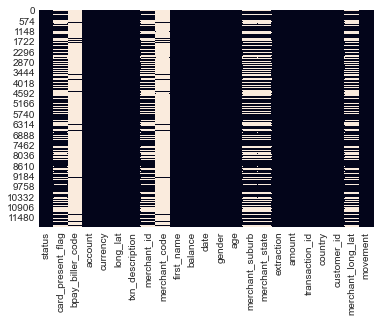

In [7]:
# In visualization form,
sns.heatmap(data.isnull(),cbar= False)

#### Intrepretation:
a) Null/Missing values can be observed for six columns (flag, bpay_biller_code,merchant_id,merchant_code,merchant_suburb and 
merchant long_lat). 

b) Out of which, biller code and merchant code having maximum missing values.

c) Missing values are present in each part of the dataset, that is they are not just in beginning or ending.

d) On close observation, we can see that null values in  biller code and merchant code are highly correlated.

e) Similarly, other four are highly correlated as well. This means that if there is no record any one of them , we will not have any record for other three.


## Step 2 Insights and Visualization

In [8]:
#description about the statistics of the numerical data
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


#### Intrepretation:
a) Mean of card_present flag is 0.80 , which means in 80 percent of the instances there was a case of card_present flag.

b)All customers are above 18 (that is adult).

c) In case of amount and balance, there is a vast difference between 75% value and max. This implies a presence of positive outliers. In other words, there are some customers involved in a very high balance and amount compared to the rest of the costumers.

d) on mean , people spend on average 187 dollars each time they visit the firm. While the median , that is 50% value, is 29.
So, mean is greater than median by a massive difference . Since mean isaffected by outliers, there prevails a situation of positive outliers , that is some transaction amount are quite high and different from the entire data

#### Dealing with missing values:
1) We know that there are 7 columns having missing values: card_present_flag, bpaycode, merchant_id, merchant_code, merchant_suburb,merchant_state, and merchant_long_lat.

2) Out of these 7, 3 seems to have less of predicton power: bpaycode, merchant_id, merchant_code. So, we can get rid of them

3) While other 4 can be filled based on some specified value.


#### Getting the salary column into the dataframe

In [9]:
#finding salary: it should be equal to the amount of pay/salary transactions
df_salaries = data[data.txn_description =="PAY/SALARY"].groupby('customer_id').mean()

In [10]:
salaries =[]
for x in data['customer_id']:
    salaries.append(df_salaries.loc[x]['amount'])

# using salaries to get the column for salary
data['salaries'] = salaries    

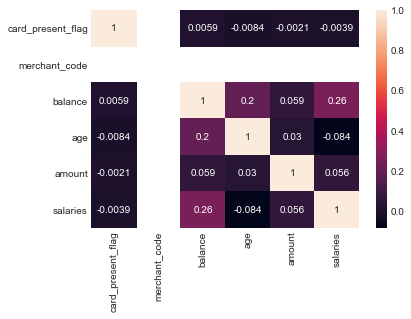

In [11]:
cor = data.corr()
sns.heatmap(cor,annot =True)# heatmap

#### Intrepretation:
Based on the above correlation heatmap, one can say that salaries is at max correlated with balance, 
having a correlation of 0.26.

#### Gaining insights with the help of scatter plot

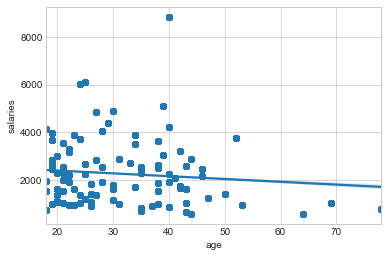

In [12]:
sns.regplot(x='age',y='salaries',data=data)
#there seem to be negative link between age and salaries

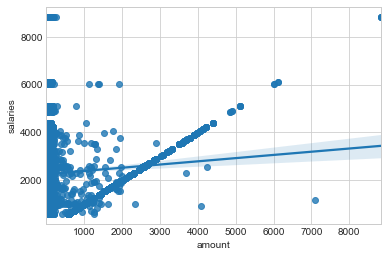

In [13]:
#link between amount and salaries
sns.regplot(x='amount',y='salaries',data=data)

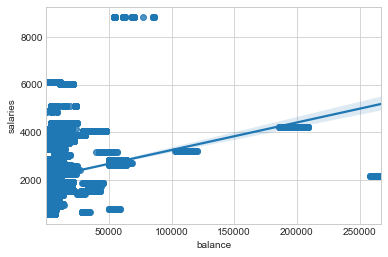

In [14]:
# correlation between salaries and balance
sns.regplot(x='balance',y='salaries',data=data)

####  Intrepretation:
a) There appears a negative link between age and salaries, that is with age salaries fall.

b) There is a linear and positive correlation between amount and salaries. That is, one tends to have more of transacions amount with a higher salary.

c) Similarly, we observe a direct association between balance and salaries. A higher balances is followed by a higher salary

## Step 3 Data Cleaning

In [15]:
#doing feature engineering
data['month'] = pd.DatetimeIndex(data['date']).month
data['month'] = data['month'].map({8:'August',9:'September',10:'October'})

In [16]:
data_c = data.copy() # working on the copy of the dataset, making the original one intact

In [17]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

## 
Null values are present in three columns : card_present flag, merhcnat state and suburb
so we will deal with them as follows. We will remove merchant state and suburb feature and fill null values of cardpresent flag with the most frequent value.

#### Removing irrelevant variables

In [18]:
data_c.drop(['status','bpay_biller_code','account','currency','long_lat','merchant_id','first_name','merchant_code',
       'merchant_suburb', 'merchant_state', 'extraction','date',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat'
       ],axis=1,inplace =True)

#### Filling missing values


In [19]:
data_c['card_present_flag'].fillna(1,inplace=True)

In [20]:
data_c.isnull().sum()

card_present_flag    0
txn_description      0
balance              0
gender               0
age                  0
amount               0
movement             0
salaries             0
month                0
dtype: int64

In [21]:
# getting dummines of categorical variables
data_c=pd.get_dummies(data_c,columns = ['txn_description','gender','month','movement',],drop_first=True) #dropping first to get ride of dummy variable trap)

#### Working with outliers
From the description statistics, we observe that there are outliers in the amount and balance feature.  In order to get only real data, we will find zscore and then the values lying less than -3 or more than 3 would be considered an outlier. So, we will take only records where zscore is between -3 and 3.

In [22]:
from scipy import stats
#getting only those data point having no outliers
z_score = abs(stats.zscore(data_c)) 
data_c = data_c[(z_score <3).all(axis=1)]

In [23]:
data_c.info() # no null values now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10572 entries, 0 to 12042
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   card_present_flag           10572 non-null  float64
 1   balance                     10572 non-null  float64
 2   age                         10572 non-null  int64  
 3   amount                      10572 non-null  float64
 4   salaries                    10572 non-null  float64
 5   txn_description_PAY/SALARY  10572 non-null  uint8  
 6   txn_description_PAYMENT     10572 non-null  uint8  
 7   txn_description_PHONE BANK  10572 non-null  uint8  
 8   txn_description_POS         10572 non-null  uint8  
 9   txn_description_SALES-POS   10572 non-null  uint8  
 10  gender_M                    10572 non-null  uint8  
 11  month_October               10572 non-null  uint8  
 12  month_September             10572 non-null  uint8  
 13  movement_debit              105

In [24]:
data_c.head(5)

,card_present_flag,balance,age,amount,salaries,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_M,month_October,month_September,movement_debit
0,1.0,35.39,26,16.25,1013.67,0,0,0,1,0,0,0,0,1
1,0.0,21.20,26,14.19,1013.67,0,0,0,0,1,0,0,0,1
2,1.0,5.71,38,6.42,1002.13,0,0,0,1,0,1,0,0,1
3,1.0,2117.22,40,40.90,892.09,0,0,0,0,1,0,0,0,1
4,1.0,17.95,26,3.25,1013.67,0,0,0,0,1,0,0,0,1


## Step 4 Data Modelling

In [25]:
#defining x and y variables
x = data_c.drop('salaries',axis=1)
y = data_c['salaries']

In [26]:
# dividing it into test and train split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state =4)

#### Using the simple regression model

In [27]:
lr =  LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
#prediction
y_pred = lr.predict(x_test)

In [29]:
mean_absolute_error(y_pred,y_test)

958.4730417443463

In [30]:
lr.score(x_test,y_test)
# 11 percent of variability

0.11900412361542911

####  Using the decision tree prediction

In [31]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred= dtr.predict(x_test)

In [32]:
mean_absolute_error(y_test,y_pred)

132.96298902762106

In [33]:
dtr.score(x_test,y_test)
#85 percent of the variance is explained by the decision tree regression model

0.8602477016593866

<BarContainer object of 13 artists>

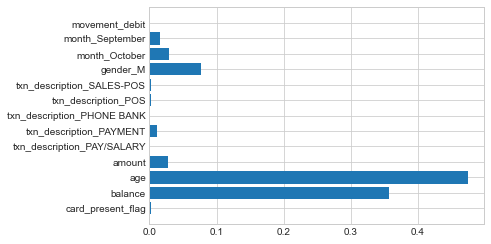

In [34]:
#see how each feature contributes to the prediction
importance = dtr.feature_importances_
plt.barh(x.columns,importance)

#### Reducing dimensionality based on feature importance
The features like age, balance, month, gender and amount are playing a role in determing the salary  so we will remove other and then form the  new reduced model.

In [35]:
data_c.drop(['movement_debit','txn_description_PAY/SALARY', 'txn_description_PAYMENT', 'txn_description_PHONE BANK', 'txn_description_POS',
'txn_description_SALES-POS', 'card_present_flag'],axis=1,inplace=True)

In [36]:
#see the new one
data_c.head(5)

,balance,age,amount,salaries,gender_M,month_October,month_September
0,35.39,26,16.25,1013.67,0,0,0
1,21.20,26,14.19,1013.67,0,0,0
2,5.71,38,6.42,1002.13,1,0,0
3,2117.22,40,40.90,892.09,0,0,0
4,17.95,26,3.25,1013.67,0,0,0


In [37]:
x = data_c.drop('salaries',axis=1)
y= data_c['salaries']

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25,random_state=0)

In [39]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred= dtr.predict(x_test)
dtr.score(x_test,y_test)
#83 percent accuracy with a much  less and easy model

0.8390837349258751

## Step 5  Conclusion
a)
The linear regression model yield an average error of 958 dollars from the true salary. Also , this model explains only 11 % of variability in test data. So, this model is not good enough for segmenting the data.

b)
The decision tree regression is able to explain 84 percent of variability in data and gives an error of 100 odd dollars from the true salary (compared to 958 dollars in case of linear regression). Thus, it performs much better and thus, can be used for 
segmenting customers for reporting needs.

